# Unstructured Data Analytics HW2

Name: Haoyu Wang

Andrew ID: haoyuw2

Collaborators (if none, say "none"; do *not* leave this blank): None

Reminder: you should not be sharing code.

## Question 1: Clustering emails using Gaussian Mixture Models [50 pts]

For this problem, we will be analyzing emails taken from the [Enron Email Dataset](https://www.cs.cmu.edu/~enron/). We have already curated the data for you in the `data/enron` directory, with one file per email (so there is no need to redownload the dataset as it is already included in this homework zip archive). The dataset includes a combination of "spam" and "ham" emails. Spam emails are unsolicited messages intended to sell a product or scam users into providing personal information, while ham emails represent everything that is not spam.

The language used in spam emails tends to be considerably different from typical business emails. Most spam filters leverage this difference in word frequencies to detect spam as it arrives and filter it out of email inboxes. We will use Gaussian Mixture Models (GMMs) to cluster the emails and attempt to identify groups of emails which are likely to be spam.

### Part A: Construct a list of processed documents [10 points]

Provided below is a function that returns a document present in a file given a filename. The function performs some preprocessing to (1) remove punctuation, (2),(3) remove whitespace and (4) lowercase all words. Using the `make_word_list` function, construct a list of processed documents.

In [1]:
import re
import string
import codecs
import numpy as np

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [2]:
import glob
file_path = [file for file in glob.glob('.\data\enron\*.txt')]
print(file_path)

['.\\data\\enron\\0001.2000-01-17.txt', '.\\data\\enron\\0002.2001-05-25.txt', '.\\data\\enron\\0003.2000-01-17.txt', '.\\data\\enron\\0004.2001-06-12.txt', '.\\data\\enron\\0005.2001-06-23.txt', '.\\data\\enron\\0006.2001-06-25.txt', '.\\data\\enron\\0007.2000-01-17.txt', '.\\data\\enron\\0008.2001-06-25.txt', '.\\data\\enron\\0009.2001-06-26.txt', '.\\data\\enron\\0010.2001-06-28.txt', '.\\data\\enron\\0011.2001-06-29.txt', '.\\data\\enron\\0012.2000-01-17.txt', '.\\data\\enron\\0013.2001-06-30.txt', '.\\data\\enron\\0014.2001-07-04.txt', '.\\data\\enron\\0015.2001-07-05.txt', '.\\data\\enron\\0016.2001-07-06.txt', '.\\data\\enron\\0017.2000-01-17.txt', '.\\data\\enron\\0018.2001-07-13.txt', '.\\data\\enron\\0019.2000-01-17.txt', '.\\data\\enron\\0020.2001-07-28.txt', '.\\data\\enron\\0021.2000-01-17.txt', '.\\data\\enron\\0022.2001-08-01.txt', '.\\data\\enron\\0023.2001-08-01.txt', '.\\data\\enron\\0024.2001-08-01.txt', '.\\data\\enron\\0025.2001-08-01.txt', '.\\data\\enron\\0026.20

In [3]:
########################################################################
######################### Write your code here #########################
########################################################################
processed_documents = []
for file in file_path: 
    processed_documents.append(make_word_list(file))

In [4]:
print(processed_documents[1:10])

['subject fw this is the solution i mentioned lsc oo thank you your email address was obtained from a purchased list reference mid if you wish to unsubscribe from this list please click here and enter your name into the remove box if you have previously unsubscribed and are still receiving this message you may email our abuse control center or call or write us at nospam coral way miami fl web credit inc all rights reserved', 'subject re additional responsibility congratulations on this additional responsibility i will be more than happy to help support your new role in any way possible my apologies again for having to leave the staff meeting early yesterday susan enron north america corp from sally beck pm to mary solmonson hou ect ect brent a price hou ect ect bob shults hou ect ect sheila glover hou ect ect cc susan harrison hou ect ect subject additional responsibility two of you had to leave the staff meeting before this final discussion point and three of you were not in attendanc

### Part B: Construct a document matrix [10 points]

Next, construct a document matrix `X` as a matrix of [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features for each document. TF-IDF features encode information about the word frequency within a document, weighted by the frequency of the same word for corpus as a whole.

   - Use the `TfidfVectorizer` from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create the document matrix `X`.
   - Set `min_df=50`; this drops words that don't occur in at least 50 documents.
   - Set `stop_words="english"` and `max_df=0.8` to filter out stop-words.
   - Print the number of unique words in the vocabulary Hint: Look for the `vocabulary_` attribute in the `TfidfVectorizer` object after fitting the vectorizer to the data set. The vocabulary will also be needed in part (d).

In [5]:
#Term Frequency =  the number of times a term occurs in a document is called its term frequency. However, in the case where the length of documents varies greatly, adjustments are often made
#The weight of a term that occurs in a document is simply proportional to the term frequency.

In [6]:
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 50, stop_words = "english", max_df = 0.8)
X = tfidf.fit_transform(processed_documents)

In [7]:
print(tfidf)

TfidfVectorizer(max_df=0.8, min_df=50, stop_words='english')


In [8]:
print(X)
# How to interpret (0, 1275) 0.026473040748766507
# 0: refers to row0 (first row), 1275: refers to a vocabulary, and this word in that row's Tfidf value is 0.026473040748766507, so the significance of that word is 0.026

  (0, 1275)	0.026473040748766507
  (0, 1662)	0.02490930158289394
  (0, 509)	0.02779401477965807
  (0, 943)	0.027546420031786513
  (0, 904)	0.025605878552149457
  (0, 1487)	0.03298478073165032
  (0, 341)	0.023366806850545947
  (0, 930)	0.03843196928040888
  (0, 967)	0.01833594869209491
  (0, 1377)	0.032357835117068134
  (0, 345)	0.020910087458641476
  (0, 628)	0.035140595790636595
  (0, 559)	0.021171870996955867
  (0, 1594)	0.03556177898775825
  (0, 241)	0.03401296221492902
  (0, 1212)	0.027127167120793223
  (0, 289)	0.022269076093272933
  (0, 958)	0.032249752059937194
  (0, 1268)	0.03387569499354922
  (0, 1027)	0.0342241521789628
  (0, 694)	0.02596112755631048
  (0, 119)	0.04453815218654587
  (0, 367)	0.028080020007693923
  (0, 334)	0.026780220141631568
  (0, 217)	0.032249752059937194
  :	:
  (5170, 1142)	0.12333676470503042
  (5170, 1233)	0.092705077021645
  (5170, 645)	0.10462128350999017
  (5170, 205)	0.1309000411564652
  (5170, 422)	0.1393630869537214
  (5170, 1561)	0.1271152825002

In [9]:
X.shape

(5171, 1680)

In [10]:
type(X)

scipy.sparse.csr.csr_matrix

In [11]:
words = tfidf.vocabulary_
num_of_unique_vocabu = len(words)
print(num_of_unique_vocabu)  #1680
print(type(words))

1680
<class 'dict'>


### Part C: Perform Clustering [10 points]

Perform clustering on the document matrix `X` using GMMs. 
- Use the `GaussianMixture` module from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster the documents.
- Set the number of clusters (mixture components) to 3.
- Print the number of documents assigned to each cluster.

In [12]:
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.mixture import GaussianMixture      #GaussianMixture: is a python class
gmm = GaussianMixture(n_components=3, n_init=50, random_state=0)
# Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used.
# gmm is created from GaussianMixture class
# n_compopents:  is like # of clusters 
gmm.fit(X.toarray())

GaussianMixture(n_components=3, n_init=50, random_state=0)

In [13]:
X_array = X.toarray()
print(X_array.shape)

(5171, 1680)


In [14]:
predicted_cluster = gmm.predict(X_array)
n_components=3
for i in range(n_components):
    print("cluster", i, ": # of documents assigned is", (i == predicted_cluster).sum())

cluster 0 : # of documents assigned is 3744
cluster 1 : # of documents assigned is 646
cluster 2 : # of documents assigned is 781


In [15]:
np.sort(gmm.weights_)[::-1]     #bigger probability means bigger cluster and the sum should be equal to 1

array([0.7240379 , 0.15103462, 0.12492748])

### Part D: Characterize the clusters [10 points]

Now, we will attempt to characterize the clusters based on the frequency of spam-relevant words. 
- Select 3 "spammy" words from the vocabulary that you expect to occur frequently in spam emails and less frequently in normal business emails (e.g., 'click', 'www', 'offer'). Construct a list, `spam_indices`, storing the indices of the spammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Select 3 "hammy" words from the vocabulary you think will occur frequently in business emails and infrequently in spam emails (e.g., 'meeting', 'attached', 'review'). Construct a list, `ham_indices`, storing the indices of the hammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Use the function provided below, `plot_spam_words_by_cluster`, to plot the average TF-IDF features for your selected spammy words and hammy words for each cluster. The function takes the following parameters:
    - `X` is a matrix of TF-IDF features (rows index documents, columns index terms).
    - `predicted` is predicted cluster assignments returned by `GaussianMixture.predict()`
    - `n_clusters` is the number of clusters. This should match the number of clusters from your GMM.
    - `spam_indices` is a list of indices of spammy words in the vocabulary.
    - `ham_indices` is a list of indices of hammy (typical business) words in the vocabulary.

In [16]:
spam_words = ['click', 'www', 'offer']
ham_words = ['meeting', 'attached','review']
spam_indices = []
ham_indices = []

In [17]:
print(list(words).index('click')) # 114
print(list(words).index('www'))   # 322
print(list(words).index('offer')) # 191

print(list(words).index('meeting'))
print(list(words).index('attached'))
print(list(words).index('review'))

for spam_word in spam_words:
    s_indices = list(words).index(spam_word)
    spam_indices.append(s_indices)
    
for ham_word in ham_words:
    h_indices = list(words).index(ham_word)
    ham_indices.append(h_indices)    


114
322
191
99
70
341


In [18]:
print(spam_indices)

[114, 322, 191]


In [19]:
print(ham_indices)

[99, 70, 341]


In [20]:
## how to find the top k words in the spam cluster and top k words in the ham cluster? based on tfIdf value?

In [21]:
volcabulary = np.array(tfidf.get_feature_names())
tfidf_sorted = np.argsort(X.toarray()).flatten()[::-1]
k = 3
top_k = volcabulary[tfidf_sorted][:k]
print(top_k)

['software' 'localized' 'mx']


In [22]:
# select each "spammy" word with most tfIdf from each clusters
gmm_cluster_assignments = gmm.predict(X.toarray())

In [23]:
def plot_spam_words_by_cluster(X, predicted, n_clusters, spam_indices, ham_indices):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_spam = []
    mean_tfidf_ham = []
    for spam in spam_indices:
        mean_tfidf_spam.append([])
    for ham in ham_indices:
        mean_tfidf_ham.append([])
    
    for i in range(n_clusters):
        for j, spam_idx in enumerate(spam_indices):
            mean_tfidf_spam[j].append(X[predicted==i, spam_idx].mean())
        for j, ham_idx in enumerate(ham_indices):
            mean_tfidf_ham[j].append(X[predicted==i, ham_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot spam bars
    for i, val in enumerate(mean_tfidf_spam):
        spam_bar = ax.bar(ind - (len(mean_tfidf_spam)-i-1)*width, val, width, color='r', bottom=0)

    # Plot ham bars
    for i, val in enumerate(mean_tfidf_ham):
        ham_bar = ax.bar(ind + (len(mean_tfidf_ham)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster for Spam-Relevant Words')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((spam_bar[0], ham_bar[0]), ('Spammy words', 'Hammy words'))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

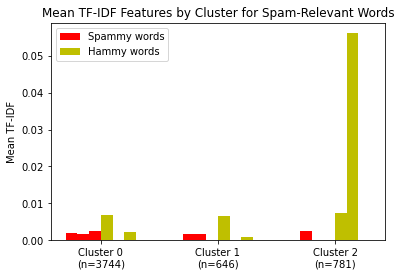

In [24]:
########################################################################
######################### Write your code here #########################
########################################################################
plot_spam_words_by_cluster(X_array, gmm_cluster_assignments, 3, spam_indices, ham_indices)

### Part E: Interpret results [10 points]

From the plot generated in part (d), do any of the clusters correspond to spam emails, based on the frequency of spammy and hammy words? Do any of the clusters appear to correspond to typical business emails (ham)? 

Re-run your analysis with a different choice for the number of clusters in your GMM (e.g., `n_clusters=5` or `n_clusters=2`). How does changing the number of clusters affect your results? Does one choice of `n_clusters` appear better than another for locating clusters of spam emails?

*** WRITE YOUR ANSWER HERE IN TEXT ***

when n_clusters = 3, from the chart above, Cluster 2 has the most hammy words based on the value of mean TF-IDF, therefore, I think cluster 2 can be classifed as Ham Emails. 

when n_clusters = 2, from the chart below, Cluster 0 contains higher Hammy words mean TF-IDF, I would classify Cluster 0 as Hammy cluster. However, we can see that even in the Hammy cluster, there are still quite some proportion emails contain spammy words. 

when n_clusters = 5, from the chart below, Cluster 3 is the Hammy words cluster as the mean TF-IDF for selected spam words are 0. But for other clusters, they contain both hammy words and spammy words. 



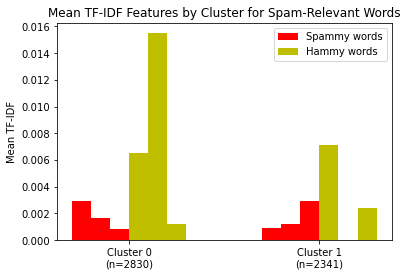

In [25]:
gmm2 = GaussianMixture(n_components=2, n_init=50, random_state=0)
gmm2.fit(X_array)
gmm_cluster_assignments_2 = gmm2.predict(X_array)
plot_spam_words_by_cluster(X_array, gmm_cluster_assignments_2, 2, spam_indices, ham_indices)

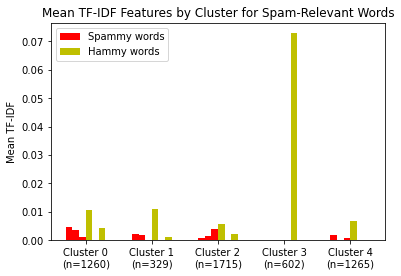

In [26]:
gmm5 = GaussianMixture(n_components=5, n_init=50, random_state=0)
gmm5.fit(X_array)
gmm_cluster_assignments_5 = gmm5.predict(X_array)
plot_spam_words_by_cluster(X_array, gmm_cluster_assignments_5, 5, spam_indices, ham_indices)

## Question 2: Latent "Purposes" in Mobile Apps [45 points]


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data [0 points]

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [28]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [29]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)  # remove duplicates on specific column(s), use subset.

In [30]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### Part B: Convert each app into a "document" [0 points]

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [31]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.values


#del df # uncomment to free up RAM
#del df_perms # uncomment to free up RAM

### Part C: Downweight "stopwords" [2.5 points]

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [32]:
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.feature_extraction.text import TfidfTransformer
tf_vectorizer = TfidfTransformer()
X_norm = tf_vectorizer.fit_transform(X)
print(X_norm)

  (0, 171)	0.18350513998217455
  (0, 165)	0.14680027363978176
  (0, 145)	0.10476925928242804
  (0, 144)	0.10827677744645378
  (0, 142)	0.2170927897097771
  (0, 141)	0.23811087509232562
  (0, 140)	0.37738825702912665
  (0, 139)	0.2496371578643755
  (0, 138)	0.1669259449195421
  (0, 126)	0.4486064270266414
  (0, 112)	0.1651275802984702
  (0, 106)	0.11271839148342057
  (0, 95)	0.20822966545774532
  (0, 90)	0.19935809061526952
  (0, 88)	0.13635261646511806
  (0, 86)	0.08532587181481394
  (0, 84)	0.14385676244868395
  (0, 83)	0.09069886117189749
  (0, 80)	0.07160855204898149
  (0, 79)	0.13623490833395224
  (0, 78)	0.17826996166593922
  (0, 76)	0.052904865610962575
  (0, 73)	0.32296309872902457
  (0, 69)	0.17849294376409255
  (0, 68)	0.10997859690428329
  :	:
  (180289, 144)	0.38742450930089006
  (180289, 84)	0.5147330472488257
  (180289, 83)	0.3245290690429833
  (180289, 80)	0.25622214470728616
  (180289, 79)	0.48746133525293456
  (180289, 76)	0.18929859275774005
  (180290, 76)	0.4334976855

### Part D: Discover 10 "topics" [2.5 points]

   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [33]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, max_iter = 10, n_jobs=-1, random_state=0)
X_lda = lda.fit_transform(X_norm)

Wall time: 1min 21s


In [34]:
row = X_lda.shape[0]
print(row)
col = X_lda.shape[1]
print(col)

180295
10


Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic [15 points]

Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

   * Topic #i: "your interpretation"

In [35]:
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print(topic_word_distributions)
print(len(topic_word_distributions))    #10 
type(topic_word_distributions)

[[2.85505917e-06 2.85506750e-06 2.85505918e-06 ... 2.85506024e-06
  2.85511722e-06 2.85505920e-06]
 [5.74213087e-06 5.74212539e-06 5.74222451e-06 ... 5.74213410e-06
  5.74217913e-06 5.74212535e-06]
 [2.75738840e-06 2.75738841e-06 2.75738842e-06 ... 2.75738841e-06
  2.75738865e-06 2.75738840e-06]
 ...
 [4.67759385e-06 4.67758923e-06 1.55144350e-04 ... 4.67760065e-06
  4.67766915e-06 4.67758422e-06]
 [3.63740271e-06 3.63741181e-06 3.63740273e-06 ... 3.63742206e-06
  3.63751028e-06 3.63740271e-06]
 [3.63965715e-06 3.63972993e-06 3.63951656e-06 ... 3.63967624e-06
  4.16418351e-02 3.63952611e-06]]
10


numpy.ndarray

In [36]:
########################################################################
######################### Write your code here #########################
########################################################################
num_top_words = 10

def print_top_words(topic_word_distributions, num_top_words):
    num_topics = len(topic_word_distributions)

    print('top %d words index per topic and their probabilities within the topic is shown below:' % num_top_words)
    
    for topic_idx in range(num_topics):
        print('Topic ', topic_idx , sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(word_idx, ':', topic_word_distributions[topic_idx, word_idx])

print_top_words(topic_word_distributions, num_top_words)

top 10 words index per topic and their probabilities within the topic is shown below:
Topic 0
144 : 0.2564494999491137
145 : 0.24650468420432853
76 : 0.15421500176021155
80 : 0.10148873290783794
83 : 0.08057643744231588
86 : 0.06369555562003527
84 : 0.051939345844267217
166 : 0.021990441913125706
79 : 0.01956235591457967
14 : 0.0009866530013707695
Topic 1
68 : 0.44428245980772507
76 : 0.14349279845405583
80 : 0.0966530620295862
86 : 0.06544932291016663
95 : 0.057848314210433315
83 : 0.0552984383757404
106 : 0.0347238675649182
66 : 0.028542536008517763
39 : 0.019679619165049796
104 : 0.019087815938344625
Topic 2
76 : 0.7022104877222052
80 : 0.2972615958455252
125 : 5.9160382805256755e-05
165 : 2.757393541293915e-06
104 : 2.7573917637574935e-06
142 : 2.7573913758253987e-06
138 : 2.757391079126519e-06
85 : 2.757389580027534e-06
141 : 2.7573889337502497e-06
156 : 2.7573889067662275e-06
Topic 3
138 : 0.12154453716972817
28 : 0.047056663070922176
141 : 0.03938290671674154
86 : 0.037792315114

In [37]:
for topic_idx, word_dist in enumerate(lda.components_):
    print('[Topic', topic_idx, ']')
    top_word_indices = np.argsort(-word_dist)[:10]
    for permission in top_word_indices:
        print(permission_columns[permission])
    

[Topic 0 ]
Your location : coarse (network-based) location (D)
Your location : fine (GPS) location (D)
Network communication : full Internet access (D)
Network communication : view network state (S)
Phone calls : read phone state and identity (D)
Storage : modify/delete USB storage contents modify/delete SD card contents (D)
Services that cost you money : directly call phone numbers (D)
Your personal information : read sensitive log data (D)
Network communication : view Wi-Fi state (S)
Default : access checkin properties (S)
[Topic 1 ]
Hardware controls : control vibrator (S)
Network communication : full Internet access (D)
Network communication : view network state (S)
Storage : modify/delete USB storage contents modify/delete SD card contents (D)
System tools : disable keylock (D)
Phone calls : read phone state and identity (D)
System tools : prevent device from sleeping (D)
Hardware controls : change your audio settings (D)
Default : modify battery statistics (S)
System tools : modi

*** WRITE YOUR ANSWER HERE IN TEXT ***

Topic 0: contains general permission information which can be applied to almost all kinds of apps

Topic 2: Finance Management related apps

Topic 6: apps for taking pictures and videos 



### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic [15 points]

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [38]:
app_names = np.array(app_names)
print(app_names[0:10])
print(app_ratings)

['Google Maps' 'Snowfall Live Wallpaper' 'Aquarium Live Wallpaper'
 'GO Weather' 'Hot Stripper Girl Vol.1' 'Thunderstorm Live Wallpaper'
 'Sun Rise Free Live Wallpaper' '3D FireFlies Live Wallpaper'
 'Animated Weather Widget, Clock' 'Koi Free Live Wallpaper']
[1438259   18147   62145 ...       4       2     137]


In [39]:
########################################################################
######################### Write your code here #########################
########################################################################
for topic_idx in range(num_topics):
    print('\nTopic ',topic_idx,":")
    app_rating_index = app_ratings >= 100000   #return true or false
    # print(app_rating_index)
    X_filtered = X_lda[app_rating_index, topic_idx]
    app_name = app_names[app_rating_index]
    top_3 = np.argsort(-X_filtered)[:3]
    
    for app in top_3:
        print("app name is", app_name[app])



Topic  0 :
app name is Dictionary.com
app name is Air Control Lite
app name is Paper Toss

Topic  1 :
app name is Vaulty Free Hides Pictures
app name is Live Holdem Poker Pro
app name is Bubble Blast 2

Topic  2 :
app name is Angry Birds Seasons
app name is Yoo Ninja! Free
app name is Adobe Reader

Topic  3 :
app name is Lookout Security & Antivirus
app name is Antivirus Free
app name is Skype

Topic  4 :
app name is Real BlackJack
app name is Alchemy
app name is Tank Hero

Topic  5 :
app name is World Newspapers
app name is Paradise Island
app name is My Country

Topic  6 :
app name is Brightest Flashlight Free™
app name is Brightest Flashlight Free???
app name is Tiny Flashlight + LED

Topic  7 :
app name is Slice It!
app name is Racing Moto
app name is Blast Monkeys

Topic  8 :
app name is TuneIn Radio
app name is Restaurant Story™
app name is Restaurant Story???

Topic  9 :
app name is chompSMS
app name is Ringdroid
app name is Google Sky Map


### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE [10 points]

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.498642
[t-SNE] KL divergence after 1000 iterations: -0.013957


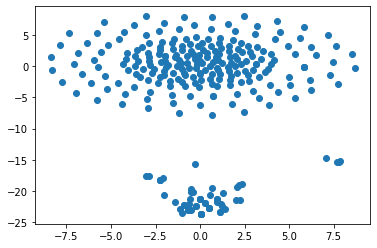

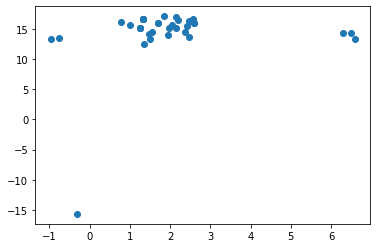

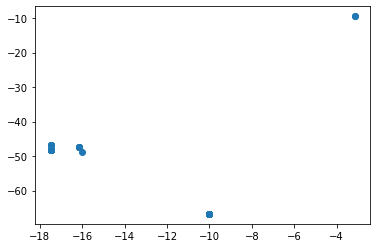

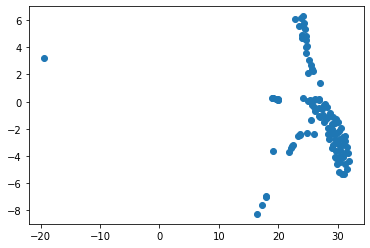

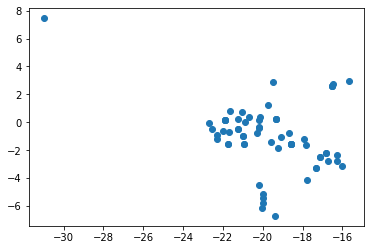

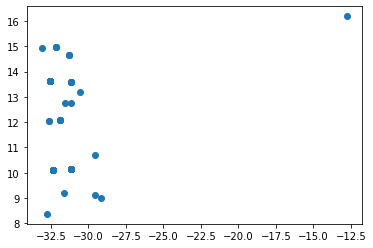

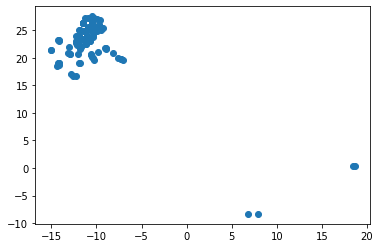

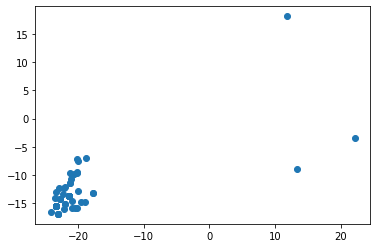

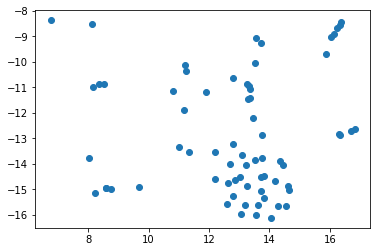

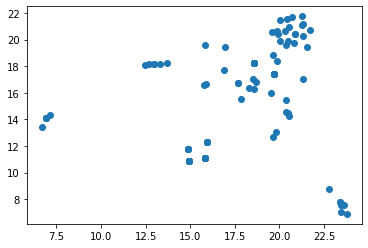

In [61]:
tsne = TSNE(n_components=2, learning_rate=100, perplexity=45,verbose=1, random_state=0, angle=.99, init='pca')
app_topic_tsne_lda = tsne.fit_transform(X_lda[:1000,:])
popular_topic = np.argmax(X_lda, axis=1)[:1000]
for i in range(num_topics):
    xs=app_topic_tsne_lda[popular_topic==i,0]
    ys=app_topic_tsne_lda[popular_topic==i,1]
    plt.scatter(xs, ys, label = str(i))
    plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.548870
[t-SNE] KL divergence after 1000 iterations: -0.159708


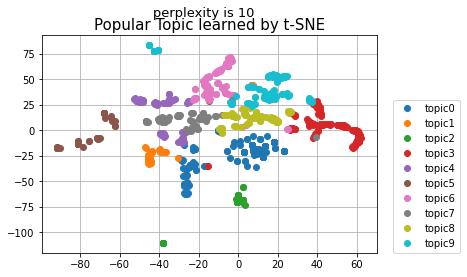

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.563385
[t-SNE] KL divergence after 1000 iterations: -0.053076


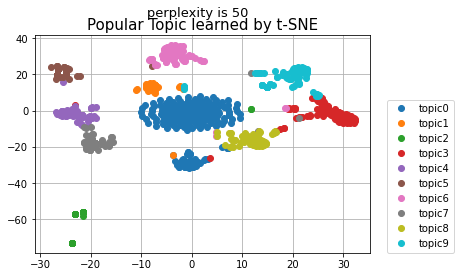

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.836346
[t-SNE] KL divergence after 1000 iterations: 0.156290


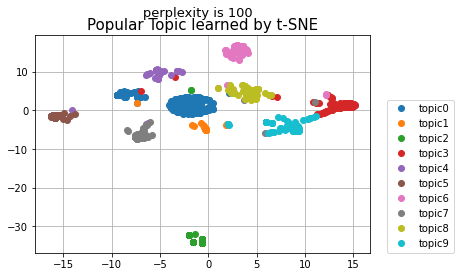

[t-SNE] Computing 999 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.070637
[t-SNE] KL divergence after 900 iterations: -0.132984


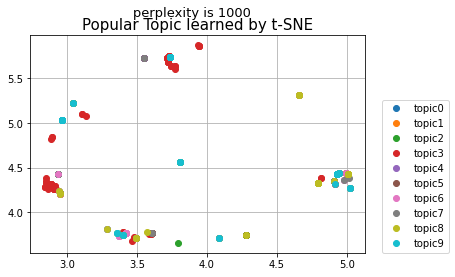

Wall time: 55 s


In [63]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.manifold import TSNE
for perp in [10, 50, 100, 1000]:
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perp, verbose=1, random_state=0, angle=.99, init='pca')
    app_topic_tsne_lda = tsne.fit_transform(X_lda[:1000,:])
    popular_topic = np.argmax(X_lda, axis=1)[:1000]
    for i in range(num_topics):
        plt.plot(app_topic_tsne_lda[popular_topic==i,0], app_topic_tsne_lda[popular_topic==i,1], 'o',label='topic' + str(i))
    plt.legend(loc=(1.05,0))
    subtitle_string = 'perplexity is ' + str(perp)
    plt.title('Popular Topic learned by t-SNE', fontsize = 15)
    plt.suptitle(subtitle_string, fontsize = 13)
    plt.grid()
    plt.show()

## Question 3: Questionnaire [5 points]

Please answer this survey after you have done this homework: https://forms.gle/ZHWcaABjUCYy8rLP9